Variance/mean = they are in a normal distrbution


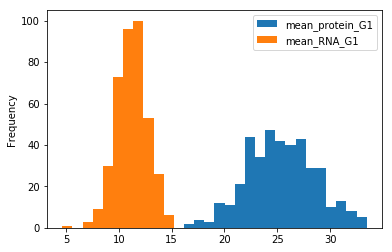

In [48]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
from collections import Counter

# Import data from file and drop rows missing NaN values
data = pd.read_excel("Cell-Cycle-Set.xlsx")
data.dropna(inplace=True)

# Histogram of G1 Cell stages in RNA and Protein distbution
histData = data[['mean_protein_G1','mean_RNA_G1']]
histData.plot.hist(bins=30)
print("Variance/mean = they are in a normal distrbution")

We can infer protein concentration from RNA concentration as similar correlation in all graphs


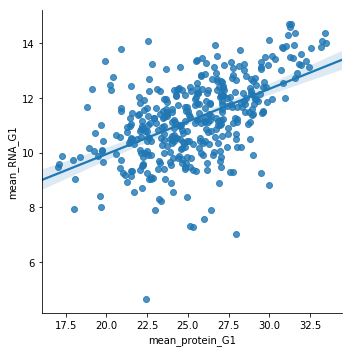

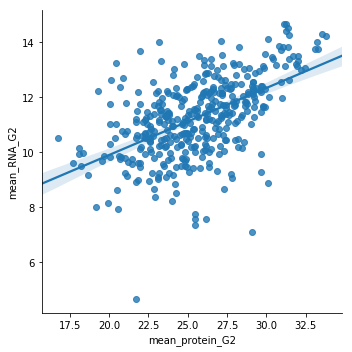

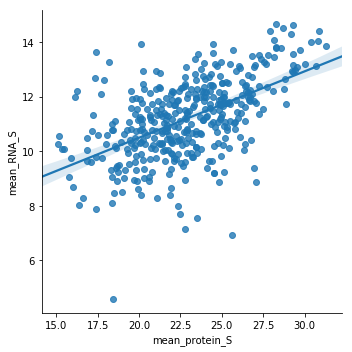

In [40]:
# Scatterplot of RNA and proteins for each stage with linear model
plotStageTwo = data[['mean_protein_G2','mean_RNA_G2']]
plotStageS = data[['mean_protein_S','mean_RNA_S']]
sns.lmplot(x='mean_protein_G1',y='mean_RNA_G1',data=histData,fit_reg=True)
sns.lmplot(x='mean_protein_G2',y='mean_RNA_G2',data=plotStageTwo,fit_reg=True)
sns.lmplot(x='mean_protein_S',y='mean_RNA_S',data=plotStageS,fit_reg=True)
print("We can infer protein concentration from RNA concentration as similar correlation in all graphs")

Change in timestamp decreases correlation from 0.99 to 0.5, almost halves it


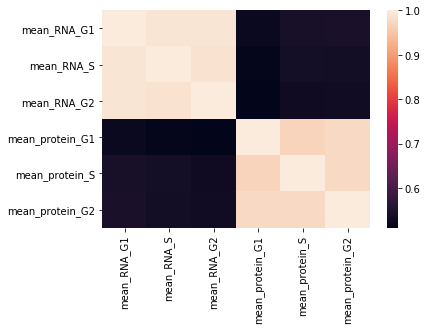

In [41]:
# Compute pairwise correlation between RNA and Proteins
print("Change in timestamp decreases correlation from 0.99 to 0.5, almost halves it")
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns)

There is a weaker correlation at stage 1 and S in the cell cycle data


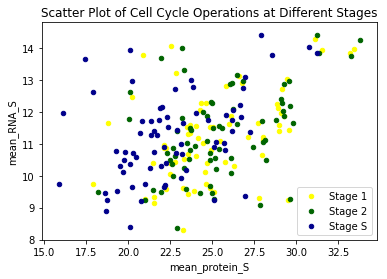

In [72]:
# Plot all genes that contain "cell cycle" in their GOBP field as scatter of stages
containCellCycle = data[data['GOBP'].str.contains("cell cycle")]
stage1Plot = containCellCycle.plot(kind='scatter', x='mean_protein_G1',y='mean_RNA_G1', color='Yellow', label='Stage 1');
stage2Plot = containCellCycle.plot(kind='scatter', x='mean_protein_G2',y='mean_RNA_G2', color='DarkGreen', label='Stage 2', ax=stage1Plot);
containCellCycle.plot.scatter(x='mean_protein_S',y='mean_RNA_S', color='DarkBlue', label='Stage S', ax=stage2Plot, title="Scatter Plot of Cell Cycle Operations at Different Stages");
print("There is a weaker correlation at stage 1 and S in the cell cycle data");

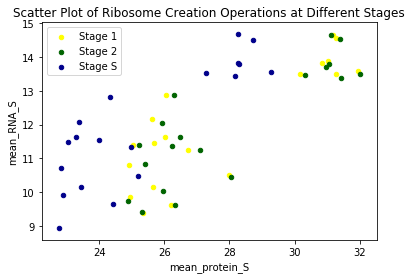

In [76]:
# Plot all genes that contain "ribosome" in their GOCC field as scatter of stages
containRibosome = data[data['GOCC'].str.contains("ribosome")]
stage1Plot = containRibosome.plot(kind='scatter', x='mean_protein_G1',y='mean_RNA_G1', color='Yellow', label='Stage 1');
stage2Plot = containRibosome.plot(kind='scatter', x='mean_protein_G2',y='mean_RNA_G2', color='DarkGreen', label='Stage 2', ax=stage1Plot);
containRibosome.plot.scatter(x='mean_protein_S',y='mean_RNA_S', color='DarkBlue', label='Stage S', ax=stage2Plot, title="Scatter Plot of Ribosome Creation Operations at Different Stages");

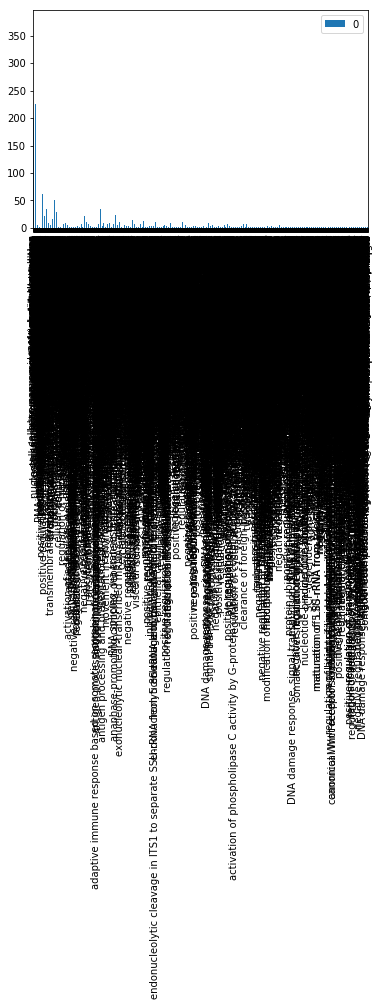

In [52]:
# Count occurences of every GOBP Terms across all genes
gobpTerms = []
for column in list(chain.from_iterable(data[['GOBP']].values)):
    gobpTerms.append(column.split(';'))
pd.DataFrame.from_dict(Counter(list(chain.from_iterable(gobpTerms))), orient='index').plot(kind='bar')

Changes in cell cycle get further apart with each new stage
There is clustering with cell cycle data, not ribosome


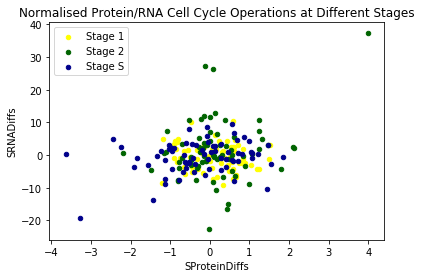

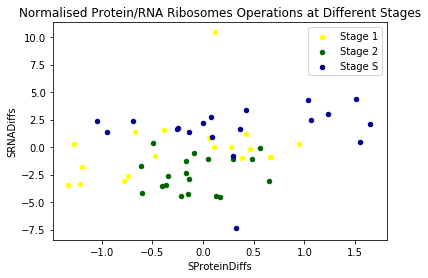

In [79]:
# Change in mRNA/protein level found by standadising difference at each stage (G1-S, S-G2, G2-G1)
G1RNADifference = data['mean_RNA_G1'] - data['mean_RNA_S']
SRNADifference = data['mean_RNA_S'] - data['mean_RNA_G2']
G2RNADifference = data['mean_RNA_G2'] - data['mean_RNA_G1']
G1ProteinDifference = data['mean_protein_G1'] - data['mean_protein_S']
SProteinDifference = data['mean_protein_S'] - data['mean_protein_G2']
G2ProteinDifference = data['mean_protein_G2'] - data['mean_protein_G1']

# Mean centre and variance scale the difference
standG1RNADifference = (G1RNADifference - G1RNADifference.mean())/G1RNADifference.var()
standSRNADifference = (SRNADifference - SRNADifference.mean())/SRNADifference.var()
standG2RNADifference = (G2RNADifference - G2RNADifference.mean())/G2RNADifference.var()
standG1ProteinDifference = (stage1ProteinDifference - G1ProteinDifference.mean())/G1ProteinDifference.var()
standSProteinDifference = (SProteinDifference - SProteinDifference.mean())/SProteinDifference.var()
standG2ProteinDifference = (G2ProteinDifference - G2ProteinDifference.mean())/G2ProteinDifference.var()

# Add values to the dataframe
dataWithStandDiffs = data.assign(G1RNADiffs=standG1RNADifference.values, SRNADiffs=standSRNADifference,
                                G2RNADiffs=standG2RNADifference.values, G1ProteinDiffs=standG1ProteinDifference.values,
                                SProteinDiffs=standSProteinDifference.values, G2ProteinDiffs=standG2ProteinDifference.values)

# Plot all genes that contain "cell cycle" in their GOBP field as scatter of stages
cellCycleDiffData = dataWithStandDiffs[dataWithStandDiffs['GOBP'].str.contains("cell cycle")]
stage1Plot = cellCycleDiffData.plot(kind='scatter', x='G1ProteinDiffs',y='G1RNADiffs', color='Yellow', label='Stage 1');
stage2Plot = cellCycleDiffData.plot(kind='scatter', x='G2ProteinDiffs',y='G2RNADiffs', color='DarkGreen', label='Stage 2', ax=stage1Plot);
cellCycleDiffData.plot.scatter(x='SProteinDiffs',y='SRNADiffs', color='DarkBlue', label='Stage S', ax=stage2Plot, title="Normalised Protein/RNA Cell Cycle Operations at Different Stages");

# Plot all genes that contain "ribosome" in their GOCC field as scatter of stages
ribosomeDiffData = dataWithStandDiffs[dataWithStandDiffs['GOCC'].str.contains("ribosome")]
stage1Plot = ribosomeDiffData.plot(kind='scatter', x='G1ProteinDiffs',y='G1RNADiffs', color='Yellow', label='Stage 1');
stage2Plot = ribosomeDiffData.plot(kind='scatter', x='G2ProteinDiffs',y='G2RNADiffs', color='DarkGreen', label='Stage 2', ax=stage1Plot);
ribosomeDiffData.plot.scatter(x='SProteinDiffs',y='SRNADiffs', color='DarkBlue', label='Stage S', ax=stage2Plot, title="Normalised Protein/RNA Ribosomes Operations at Different Stages");

print("Changes in cell cycle get further apart with each new stage")
print("There is clustering with cell cycle data, not ribosome")